Feedback dari anda diperlukan! bantu kami dalam [meningkatkan modul ini](https://forms.gle/pWJd6y4hY4KWMcno6).

In [1]:
% walaupun ini untuk MATLAB, saya ngebuat notebook ini dengan Octave
% kode dibawah ini dapat diabaikan (cuma kode loading package Octave)
pkg load symbolic
warning off

% kita memerlukan kemampuan simbolik MATLAB.
% kode di bawah ini menyatakan variabel sebagai simbol
% (tidak terevaluasi sebagai sebuah angka/vektor/matriks/dsb)
syms p

% variabel p ini akan dipakai untuk menyatakan fungsi interpolan

Symbolic pkg v2.8.0: Python communication link active, SymPy v1.4.


# Interpolasi dan Ekstrapolasi

## Interpolasi

interpolasi adalah metode membangun titik data baru di antara titik-titik data yang diketahui. Dalam bidang teknik dan sains, dengan menggunakan *sampling* maupun eksperimen akan dihasilkan sejumlah titik data yang mewakili nilai-nilai suatu fungsi dalam beberapa variabel. Sering kali diperlukan interpolasi, untuk memperkirakan nilai fungsi pada selang titik-titik hasil pengamatan tersebut.

Masalah lain yang menggunakan interpolasi adalah mengaproksimasi sebuah fungsi yang rumit dengan fungsi yang lebih sederhana. Misalkan diketahui rumus untuk suatu fungsi, namun terlalu rumit untuk dievaluasi secara efisien. Beberapa titik data dari fungsi asli dapat diambil, lalu diinterpolasi untuk menghasilkan fungsi yang lebih sederhana yang masih cukup dekat dengan aslinya. Dalam beberapa kondisi, keuntungan yang diperoleh fungsi yang lebih sederhana dapat lebih besar daripada kerugian dari kesalahan interpolasi.

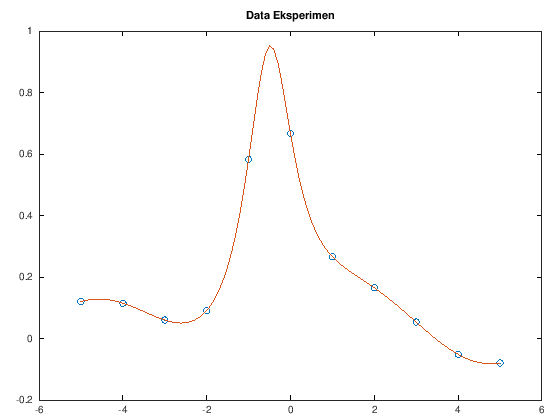

In [2]:
% Fungsi asli
g = @(x) (1+2*(x+0.5).^2).^-1 + 0.1*sin(x);

% Hasil eksperimen
x = -5:5;
y = g(x);

plot(x, y, 'o', -5:0.1:5, g(-5:0.1:5))
title('Data Eksperimen')

### Interpolasi Nearest-Neighbour

Metode interpolasi paling sederhana adalah menetapkan nilai nilai data baru sama dengan nilai data hasil pengamatan yang terdekat. Dalam masalah sederhana, metode ini sangat jarang digunakan, karena interpolasi linier (lihat di bawah) hampir sama mudahnya. Tetapi dalam interpolasi multivariat berdimensi tinggi, interpolasi ini menjadi pilihan yang disukai karena kecepatan dan kesederhanaannya.

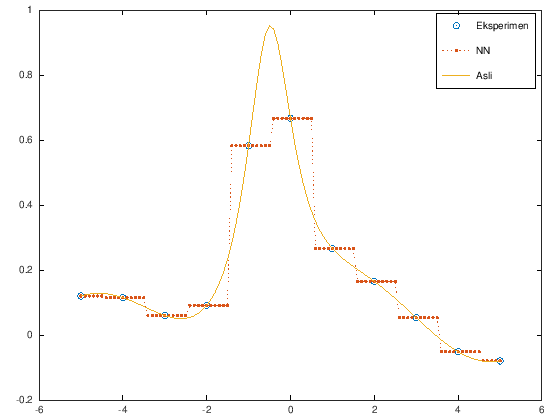

In [3]:
xn = -5:0.1:5;
yn = zeros(1,length(xn));

for idx = 1:length(xn)
    % cara ini mahal secara komputasional karena secara garis besar
    % memerlukan tiga perhitungan: pengurangan, absolut, mencari minimum
    % pada setiap elemen vektor. Tapi paling mudah diimplementasikan
    % karena ngga perlu mikir panjang panjang
    
    [_, pos] = min(abs(xn(idx) - x));
    yn(idx) = y(pos);
end

plot(x, y, 'o', xn, yn,':.', xn, g(xn));
legend('Eksperimen', 'NN', 'Asli')

### Interpolasi Linear

Salah satu metode paling sederhana adalah interpolasi linier. Secara umum, interpolasi linier mengambil dua titik data, katakanlah $(x_a, y_a)$ dan $(x_b, y_b)$, dan interpolasi diberikan oleh:

$$y = y_a + (y_b - y_a)\frac{x - x_a}{x_b - x_a} \,\,\,\text{untuk} \, x \in (x_a, x_b)$$

Walau interpolasi linier cepat dan mudah, ia tidak terlalu akurat. Kerugian lain adalah persamaan interpolan yang dihasilkan tidak dapat didiferensialkan pada titik pengamatan $x_k$.

Perkiraan galat berikut menunjukkan keakuratan dari metode ini (turunkan). Anggap fungsi yang ingin kita interpolasi adalah $g$, titik $x$ terletak diantara $x_a$ dan $x_b$, dan $g$ dapat didiferensialkan dua kali. Selanjutnya

$$ |f(x) - g(x)| \leq C (x_b - x_a)^2 \,\,\text{dengan}\,\, C = \frac{1}{8} \max_{r \in [x_a, x_ b]} |g''(r)|$$


Dengan kata lain, kesalahan sebanding dengan kuadrat jarak antara titik data. Kesalahan dalam beberapa metode lain, termasuk interpolasi polinomial dan interpolasi spline (dijelaskan di bawah), sebanding dengan pangkat yang lebih tinggi dari selisih titik data. Metode ini juga menghasilkan interpolasi yang lebih halus.

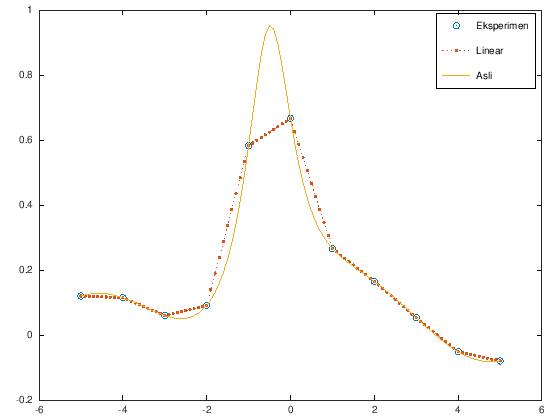

In [4]:
xn = -5:0.1:5;
yn = zeros(1, length(xn));

for pos = 1:length(xn)

    % cari titik terdekat dengan data
    [_, idx] = (min(abs(x - xn(pos))));
    xa = x(idx);
    ya = y(idx);
    
    % cari titik terdekat kedua dengan data
    if idx==1 || ((idx)<length(x)) && (abs(x(idx+1)-xn(pos)) < abs(x(idx-1)-xn(pos)))
        xb = x(idx+1);
        yb = y(idx+1);
    else
        xb = x(idx-1);
        yb = y(idx-1);
    end
    
    % interpolasikan
    yn(pos) = ya + (yb-ya)*(xn(pos)-xa)/(xb-xa);

end

yn(end) = y(end);

plot(x, y, 'o', xn, yn,':.', xn, g(xn));
legend('Eksperimen', 'Linear', 'Asli')

### Interpolasi Polinomial

Interpolasi ini adalah generalisasi dari interpolasi linier. Jika pada interpolan pada metode linier adalah fungsi linier, pada interpolasi ini digunakan polinomial tingkat tinggi. Secara umum, jika kita memiliki $n$ titik data, ada tepat satu polinomial derajat paling besar $n-1$ yang melewati semua titik data. Kesalahan interpolasi sebanding dengan pangkat $n$ dari jarak antar titik data. Lebih lanjut, karena interpolan metode ini adalah polinomial, ia dapat diferensialkan terus menerus. Jadi, interpolasi polinom mengatasi sebagian besar masalah interpolasi linier.

Namun, interpolasi polinomial juga memiliki beberapa kelemahan. Menghitung polinomial interpolasi 'mahal' secara komputasi dibandingkan dengan interpolasi linier. Selanjutnya, interpolasi polinomial dapat menunjukkan gejala osilasi, terutama pada titik akhir (fenomena Runge).

Interpolasi polinomial dapat memperkirakan maxima dan minima lokal yang berada di luar kisaran sampel, tidak seperti interpolasi linier. Namun, nilai maxima dan minima ini dapat berada diluar rentang teoritis fungsi dari fungsi asli. Misalnya, fungsi yang selalu bernilai positif dapat memiliki interpolan dengan nilai negatif.

Secara umum bentuk kurva yang dihasilkan, terutama untuk interpolan yang dibangun dari sangat banyak data atau sangat sedikit data, mungkin bertentangan dengan sistem eksperimental asli. Kerugian ini dapat dikurangi dengan menggunakan interpolasi spline atau membatasi perhatian pada polinomial Chebyshev.

#### Metode Langrage

In [5]:
P(p) = 0*p;

for i=1:length(x)
    num(p) = p - x(x ~= x(i));
    denum  = x(i)    - x(x ~= x(i));
    P(p)   = P(p) + y(i) * prod(num(p))/prod(denum);
end

P

P(p) = (symfun)

  107⋅p⋅(p - 5)⋅(p - 4)⋅(p - 3)⋅(p - 2)⋅(p - 1)⋅(p + 1)⋅(p + 2)⋅(p + 3)⋅(p + 4) 
  ───────────────────────────────────────────────────────────────────────────── 
                                    3235982400                                  
  
    347⋅π⋅p⋅(p - 5)⋅(p - 4)⋅(p - 3)⋅(p - 2)⋅(p - 1)⋅(p + 1)⋅(p + 2)⋅(p + 3)⋅(p +
  - ────────────────────────────────────────────────────────────────────────────
                                       3443005440                               
  
   5)   257⋅π⋅p⋅(p - 5)⋅(p - 4)⋅(p - 3)⋅(p - 2)⋅(p - 1)⋅(p + 1)⋅(p + 2)⋅(p + 4)⋅
  ─── + ────────────────────────────────────────────────────────────────────────
                                           1085817600                           
  
  (p + 5)   283⋅π⋅p⋅(p - 5)⋅(p - 4)⋅(p - 3)⋅(p - 2)⋅(p - 1)⋅(p + 1)⋅(p + 3)⋅(p +
  ─────── - ────────────────────────────────────────────────────────────────────
                                               295807680                        
  

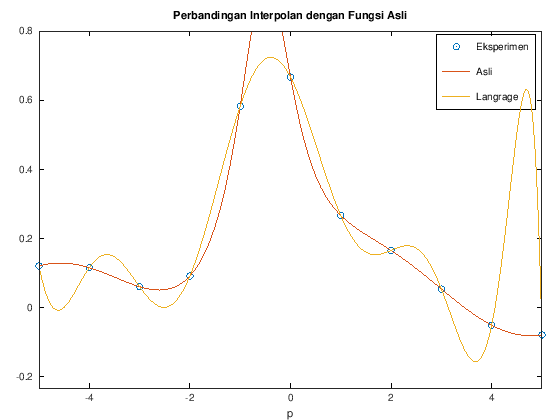

In [6]:
plot(x, y, 'o', xn, g(xn))
hold on
ezplot(P, [-5, 5])

title('Perbandingan Interpolan dengan Fungsi Asli')
legend('Eksperimen', 'Asli', 'Langrage')

#### Metode Newton

Metode Newton menarik karena memiliki bentuk yang mirip dengan polinomial Taylor. Metode Newton adalah polinomial Taylor uang berdasar pada konsep beda hingga bukan pada konsep laju perubahan sesaat. Seperti metode interpolasi lain, derajat polinomial interpolasi Newton dapat ditingkatkan dengan menambahkan lebih banyak suku dan titik tanpa membuang yang sudah ada. Bentuk dari metode Newton memiliki kemudahkan karena titik-titik baru selalu ditambahkan di satu 'ujung' persamaan yang sudah ada.

Keakuratan interpolasi polinomial tergantung pada seberapa dekat titik interpolasi ke nilai tengah kumpulan nilai $x$ yang digunakan. Jelas, ketika titik baru ditambahkan di satu ujung, nilai tengah itu menjadi lebih jauh dari titik data pertama. Oleh karena itu, jika tidak diketahui berapa banyak titik baru yang diperlukan untuk akurasi yang diinginkan, nilai tengah $x$ mungkin jauh dari tempat interpolasi dilakukan. Gauss, Stirling, dan Bessel mengembangkan formula untuk mengatasi masalah ini.

**Rumus Gauss** secara bergantian menambahkan titik-titik baru di ujung kiri dan kanan, sehingga menjaga set titik terpusat di dekat tempat yang sama (dekat titik yang dievaluasi). **Rumus Stirling** tetap berpusat tentang titik data tertentu, dan digunakan ketika titik yang dievaluasi terletak dekat ke suatu titik data (di bukan di antara/tengah dua titik data). **Rumus Bessel** tetap berpusat tentang tengah tertentu antara dua titik data, untuk digunakan ketika titik yang dievaluasi berada di tengah dari dua titik data.

In [7]:
% buat matriks untuk hitung beda terbagi
N = length(x);
D = zeros(N-1, N-1);

for k = 1:N-1  % kasus khusus
   D(k, 1) = (y(k+1) - y(k)) / (x(k+1) - x(k));
end

for j = 2:N-1
   for k = 1:N-j
      D(k, j) = (D(k+1, j-1) - D(k, j-1)) / (x(k+j) - x(k));
   end
end

% beda terbagi
a(1) = y(1);
for j = 2:N
   a(j) = D(1, j-1);
end

L(p) = p/p;                           % untuk hitung prod (x-x_j)
P(p) = a(1) + 0*p;                    % untuk hitung aj * Lj

for j = 2:N
   L(p)=(p - x(j-1)) * L(p);          % rekursif untuk Lj
   P(p) = a(j) * L(p) + P(p);         % hitung suku interpolan
end

P

P(p) = (symfun)

    π⋅p⋅(p - 4)⋅(p - 3)⋅(p - 2)⋅(p - 1)⋅(p + 1)⋅(p + 2)⋅(p + 3)⋅(p + 4)⋅(p + 5) 
  - ─────────────────────────────────────────────────────────────────────────── 
                                       711625                                   
  
    π⋅p⋅(p - 3)⋅(p - 2)⋅(p - 1)⋅(p + 1)⋅(p + 2)⋅(p + 3)⋅(p + 4)⋅(p + 5)   10⋅π⋅p
  + ─────────────────────────────────────────────────────────────────── + ──────
                                  18961141                                      
  
  ⋅(p - 2)⋅(p - 1)⋅(p + 1)⋅(p + 2)⋅(p + 3)⋅(p + 4)⋅(p + 5)   π⋅p⋅(p - 1)⋅(p + 1)
  ──────────────────────────────────────────────────────── - ───────────────────
                        233993                                                  
  
  ⋅(p + 2)⋅(p + 3)⋅(p + 4)⋅(p + 5)   67⋅p⋅(p + 1)⋅(p + 2)⋅(p + 3)⋅(p + 4)⋅(p + 5
  ──────────────────────────────── + ───────────────────────────────────────────
       2890                                             13720                   
  

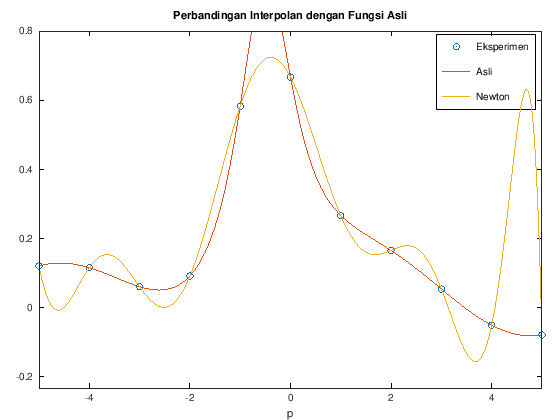

In [8]:
plot(x, y, 'o', xn, g(xn))
hold on
ezplot(P, [-5, 5])

title('Perbandingan Interpolan dengan Fungsi Asli')
legend('Eksperimen', 'Asli', 'Newton')

### Interpolasi Spline
Ingat bahwa pada interpolasi linier kita menggunakan fungsi linear untuk setiap interval $[x_k, x_{k+1}]$. Interpolasi spline menggunakan polinomial derajat rendah di masing-masing interval, dan memilih polinomial sedemikian rupa sehingga secara keseluruhan fungsi bersifat *lebih mulus*. Interpolan yang dihasilkan dengan metode ini disebut spline.

Seperti interpolasi polinomial, interpolasi spline menimbulkan galat yang lebih kecil daripada interpolasi linier dan menghasilkan interpolan lebih halus. Keuntungan dari metode ini adalah interpolan yang lebih mudah untuk dievaluasi daripada polinomial tingkat tinggi yang digunakan dalam interpolasi polinomial. Selain itu, interpolasi ini menghindari masalah fenomena Runge, karena polinom pada interpolan dibentuk untuk interval-demi-interval.

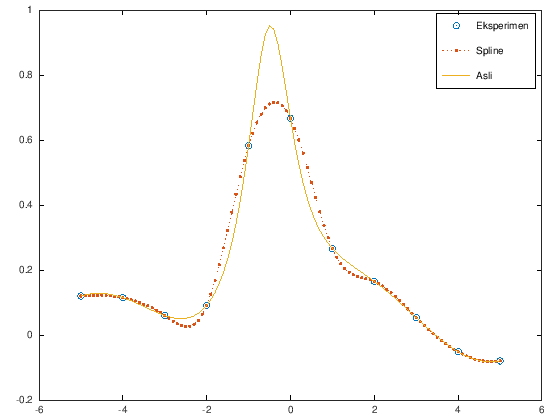

In [9]:
xn = -5:0.1:5;
yn = interp1(x, y, xn, 'spline');
plot(x, y, 'o', xn, yn,':.', xn, g(xn));
legend('Eksperimen', 'Spline', 'Asli')

## Lainnya

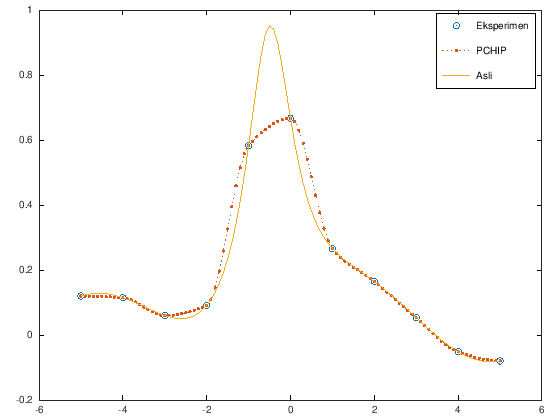

In [10]:
% Piecewise cubic Hermite interpolating polynomial
xn = -5:0.1:5;
yn = interp1(x, y, xn, 'pchip');
plot(x, y, 'o', xn, yn,':.', xn, g(xn));
legend('Eksperimen', 'PCHIP', 'Asli')